<a href="https://colab.research.google.com/github/kirubanath/ML_learnings/blob/main/ML_Basics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost

In [ ]:
#librarires needed for the lab:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

## Q1. Housing Price (SVM/SVC)

#### Load and Explore the Data

*   Think about standardizing the data.

*  How would you replace discrete attributes


In [ ]:
url = 'https://raw.githubusercontent.com/kirubanath/Datasets/main/lab3_data.csv'
data_df = pd.read_csv(url)

In [ ]:
data_df.head()

,area,land,year,price,bldtype
0,2607,1200,2010,825000.0,0
1,1950,1783,1899,1685000.0,0
2,2520,1875,1899,1100000.0,0
3,3750,3125,1931,1200000.0,1
4,7812,5021,1908,1900000.0,1


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     94 non-null     int64  
 1   land     94 non-null     int64  
 2   year     94 non-null     int64  
 3   price    94 non-null     float64
 4   bldtype  94 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.8 KB


In [ ]:
data_df.describe()

,area,land,year,price,bldtype
count,94.000000,94.000000,94.000000,9.400000e+01,94.000000
mean,8592.468085,4095.968085,1918.031915,2.812458e+06,0.382979
std,21126.893599,6433.094494,41.425267,1.705404e+06,0.488720
min,680.000000,340.000000,1829.000000,1.399280e+05,0.000000
25%,2585.000000,1455.000000,1899.000000,1.500000e+06,0.000000
50%,3389.000000,2021.500000,1903.000000,2.725000e+06,0.000000
75%,5177.250000,3646.500000,1931.000000,3.563750e+06,1.000000
max,159457.000000,45767.000000,2010.000000,7.830000e+06,1.000000


### Here year is a decrete data:

so we can either convert into categorical data or tranform it into a ordinal data

Trying with ordinal tranformation:

In [ ]:
min_year = data_df.year.min()
data_df.year = data_df.year - min_year

In [ ]:
years = data_df.year.unique()

We can now use this as a numerical data just like the other features

In [ ]:
output = data_df['bldtype']
input  = data_df.drop(columns='bldtype')

Looking at the distribution of the data

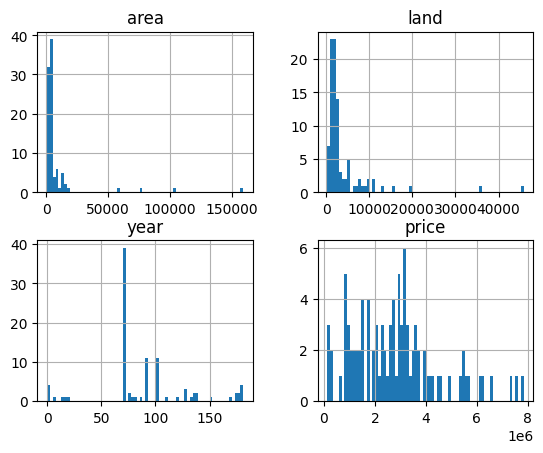

In [ ]:
input.hist(bins = 70);

Standardizing the data: Prepocessing the data

We standardize the data when the features have different scales and we use normalizing of the data when the features are skewed. Here I am choosing standardizing of the data, but the result did not chnage even when I tried normalizing.

First let us split the data into train test split and then apply the preprocessing to avoid data leakage

#### Train-Test Splot 80/20

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(input,output,train_size=0.8, random_state = 42)

Let us create a pipeline and then apply the standardization along with the SVM model

#### Train a linear model with soft margin



*   Try with initial value of C=1



In [ ]:
#create the steps for the pipeline
steps = [('scaler', StandardScaler()),('SVC' , SVC(C=1, kernel='linear'))]

#make the pipeline
pipeline = Pipeline(steps)

In [ ]:
#input the data into the pipeline 
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=1, kernel='linear'))])

In [ ]:
#predict:
Y_predict = pipeline.predict(X_test)

In [ ]:
acc = 100*((Y_test == Y_predict).sum()/19)
print("The current accuracy for C = 1 is:",acc,"%")

The current accuracy for C = 1 is: 94.73684210526315 %


In [ ]:
#checking the classification report:
print(classification_report(Y_predict,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.83      1.00      0.91         5

    accuracy                           0.95        19
   macro avg       0.92      0.96      0.94        19
weighted avg       0.96      0.95      0.95        19



#### Use cross validation to find best value of C



*   Can do it manually or use GridSearchCV

*   Divide the training set into train+validation



In [ ]:
#create the steps for the pipeline
steps = [('scaler', StandardScaler()),('SVC' , SVC(kernel='linear'))]

#make the pipeline
pipeline = Pipeline(steps)

#using cross validation:
param = {'SVC__C' : [i/2 for i in range(1,100)]}
clf = GridSearchCV(pipeline,param,cv=5,return_train_score=False)

In [ ]:
#fitting the data for tuning
clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(kernel='linear'))]),
             param_grid={'SVC__C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                    5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0,
                                    9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5,
                                    13.0, 13.5, 14.0, 14.5, 15.0, ...]})

In [ ]:
#checking best score
df = pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004593,0.002369,0.002215,0.001000,0.5,{'SVC__C': 0.5},0.933333,0.733333,0.866667,0.733333,0.800000,0.813333,0.077746,98
1,0.004015,0.001927,0.001024,0.000047,1.0,{'SVC__C': 1.0},0.933333,0.733333,0.866667,0.733333,0.800000,0.813333,0.077746,98
2,0.003820,0.001780,0.001221,0.000394,1.5,{'SVC__C': 1.5},0.933333,0.800000,0.866667,0.733333,0.866667,0.840000,0.067987,97
3,0.002066,0.000553,0.001134,0.000861,2.0,{'SVC__C': 2.0},0.933333,0.800000,0.866667,0.800000,0.933333,0.866667,0.059628,96
4,0.002427,0.000741,0.001144,0.000835,2.5,{'SVC__C': 2.5},0.933333,0.800000,0.933333,0.866667,0.933333,0.893333,0.053333,93


#### Analyse accuracy basis the new values you have computed

As we can see above the C value from 2 onwards gives the best accuracy, we will take 2 because if the value of C increases, the margin becomes lower as well. So its better to take the least C

In [ ]:
#create the steps for the pipeline
steps = [('scaler', StandardScaler()),('SVC' , SVC(C =2,kernel='linear'))]

#make the pipeline
pipeline = Pipeline(steps)

#fit the data:
pipeline.fit(X_train,Y_train)

#predict:
Y_predict = pipeline.predict(X_test)

#classification report:
print(classification_report(Y_predict,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [ ]:
acc = 100*((Y_test == Y_predict).sum()/19)
print("The current accuracy for C = 2 is:",acc,"%")

The current accuracy for C = 2 is: 100.0 %


Now let us try the above with making year as categorical rather than ordinal like we did above.

In [ ]:
data_df = pd.read_csv(url)
data_df.head()

,area,land,year,price,bldtype
0,2607,1200,2010,825000.0,0
1,1950,1783,1899,1685000.0,0
2,2520,1875,1899,1100000.0,0
3,3750,3125,1931,1200000.0,1
4,7812,5021,1908,1900000.0,1


In [ ]:
data_df['House_Type'] = np.where(data_df['year'] > 1919, 'Modern', 'Old' )

In [ ]:
data_df.head()

,area,land,year,price,bldtype,House_Type
0,2607,1200,2010,825000.0,0,Modern
1,1950,1783,1899,1685000.0,0,Old
2,2520,1875,1899,1100000.0,0,Old
3,3750,3125,1931,1200000.0,1,Modern
4,7812,5021,1908,1900000.0,1,Old


In [ ]:
data_df = pd.get_dummies(data_df, columns = ['House_Type'])

In [ ]:
output = data_df['bldtype']
input  = data_df.drop(columns=['bldtype','year'])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(input,output, train_size= 0.8, random_state = 42)

In [ ]:
X_train

,area,land,price,House_Type_Modern,House_Type_Old
65,12500,2571,5500000.0,0,1
15,4600,3064,5325000.0,0,1
68,1626,1020,1500000.0,0,1
78,76041,19250,3200000.0,1,0
30,1696,589,999000.0,0,1
...,...,...,...,...,...
60,7650,7650,3200000.0,1,0
71,680,340,885000.0,0,1
14,4035,1480,1500000.0,0,1
92,5203,4163,3294000.0,0,1


In [ ]:
X_train_nums = X_train[['area','land','price']]
X_test_nums = X_test[['area','land','price']]

In [ ]:
#standardizing the numerical data
scaler = StandardScaler()
scaler.fit(X_train_nums)
X_train_trans = scaler.transform(X_train_nums)
X_test_trans = scaler.transform(X_test_nums)

In [ ]:
X_train['area'] = X_train_trans[:,0]
X_train['land'] = X_train_trans[:,1]
X_train['price'] = X_train_trans[:,2]

In [ ]:
X_test['area'] = X_test_trans[:,0]
X_test['land'] = X_test_trans[:,1]
X_test['price'] = X_test_trans[:,2]

In [ ]:
#create the steps for the pipeline
steps = [('scaler', StandardScaler()),('SVC' , SVC(kernel='linear'))]

#make the pipeline
pipeline = Pipeline(steps)

#using cross validation:
param = {'SVC__C' : [i/2 for i in range(1,100)]}
clf = GridSearchCV(pipeline,param,cv=5,return_train_score=False)

In [ ]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(kernel='linear'))]),
             param_grid={'SVC__C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                    5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0,
                                    9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5,
                                    13.0, 13.5, 14.0, 14.5, 15.0, ...]})

In [ ]:
#checking best score
df = pd.DataFrame(clf.cv_results_)
df[df.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.002818,0.001856,0.000819,0.000411,9.5,{'SVC__C': 9.5},0.933333,0.933333,0.800000,0.933333,1.0,0.92,0.065320,1
19,0.003119,0.001779,0.000837,0.000424,10.0,{'SVC__C': 10.0},0.933333,0.933333,0.800000,0.933333,1.0,0.92,0.065320,1
34,0.002599,0.001206,0.001034,0.000070,17.5,{'SVC__C': 17.5},0.933333,0.933333,0.800000,0.933333,1.0,0.92,0.065320,1
35,0.003400,0.001754,0.001255,0.000373,18.0,{'SVC__C': 18.0},0.933333,0.933333,0.800000,0.933333,1.0,0.92,0.065320,1
36,0.002471,0.000894,0.001149,0.000234,18.5,{'SVC__C': 18.5},0.933333,0.933333,0.800000,0.933333,1.0,0.92,0.065320,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.005429,0.001377,0.002810,0.001841,47.5,{'SVC__C': 47.5},0.933333,0.866667,0.866667,0.933333,1.0,0.92,0.049889,1
95,0.005490,0.002129,0.002770,0.001495,48.0,{'SVC__C': 48.0},0.933333,0.866667,0.866667,0.933333,1.0,0.92,0.049889,1
96,0.005782,0.001945,0.002413,0.001221,48.5,{'SVC__C': 48.5},0.933333,0.866667,0.866667,0.933333,1.0,0.92,0.049889,1
97,0.005262,0.002502,0.002017,0.001993,49.0,{'SVC__C': 49.0},0.933333,0.866667,0.866667,0.933333,1.0,0.92,0.049889,1


In [ ]:
#create the steps for the pipeline
steps = [('scaler', StandardScaler()),('SVC' , SVC(C =9.5,kernel = 'linear'))]

#make the pipeline
pipeline = Pipeline(steps)

#fit the data:
pipeline.fit(X_train,Y_train)

#predict:
Y_predict = pipeline.predict(X_test)

#classification report:
print(classification_report(Y_predict,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [ ]:
acc = 100*((Y_test == Y_predict).sum()/19)
print("The current accuracy for C = 9.5 is:",acc,"%")

The current accuracy for C = 9.5 is: 100.0 %


This accuracy is same as above.

## Q2. DT and RF

Consider the Wisconsin Breast Cancer dataset available from
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
(Diagnostic)

The dataset has 32 attributes that predict malignancy. There are a
total of 569 data patterns. Use 5-fold cross-validation. 


1.   Use Keras or any other framework to construct a decision tree from the training data and obtain the performance on the test data

2.   Construct a random forest (of say, 100 trees) from the training data and use the random forest to obtain the performance on the test data

3. Compare the performance you obtain in 1 and 2


In [ ]:
url = 'https://raw.githubusercontent.com/kirubanath/Datasets/main/cancer_data.csv'
data_df = pd.read_csv(url)


In [ ]:
data_df = data_df.drop(columns = 'Unnamed: 32')

In [ ]:
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
output = data_df['diagnosis']
input = data_df.drop(columns = 'diagnosis')

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(input,output,train_size=0.8,random_state=42)

#### Decision Tree

In [ ]:
param = {'max_depth': [i for i in range(1,100)]}
clf = GridSearchCV(DecisionTreeClassifier(), param, cv =5 , return_train_score= False, error_score='raise')

In [ ]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df[df.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.008115,0.002967,0.002798,0.00171,12,{'max_depth': 12},0.945055,0.912088,0.956044,0.923077,0.934066,0.934066,0.015541,1


In [ ]:
Dtree = DecisionTreeClassifier(max_depth=4)
Dtree.fit(X_train,Y_train)
Y_predict = Dtree.predict(X_test)

In [ ]:
#accuracy:
acc = 100*((Y_test ==Y_predict).sum())/len(Y_test)
print('accuracy for the decision tree at max_depth = 4 is:',acc,'%')

accuracy for the decision tree at max_depth = 4 is: 93.85964912280701 %


#### Random Forest:

I am commenting the cross validation out since it takes a long time to run.

In [ ]:
"""
param = {'max_depth': [i for i in range(1,100)], 'n_estimators': [10,20,50,100,200,1000]}
clf = GridSearchCV(RandomForestClassifier(), param, cv =5 , return_train_score= False, error_score='raise')
clf.fit(X_train,Y_train)
df = pd.DataFrame(clf.cv_results_)
df[df.rank_test_score ==1]

"""

"\nparam = {'max_depth': [i for i in range(1,100)], 'n_estimators': [10,20,50,100,200,1000]}\nclf = GridSearchCV(RandomForestClassifier(), param, cv =5 , return_train_score= False, error_score='raise')\nclf.fit(X_train,Y_train)\ndf = pd.DataFrame(clf.cv_results_)\ndf[df.rank_test_score ==1]\n\n"

From above I am taking max_depth as 14 and n_estimators as 100

In [ ]:
rmf = RandomForestClassifier(n_estimators=100,max_depth=14)
rmf.fit(X_train,Y_train)
Y_predict_rand = rmf.predict(X_test)

In [ ]:
#accuracy:
acc = 100*((Y_test ==Y_predict_rand).sum())/len(Y_test)
print('accuracy for the Random Forest at max_depth = 14 and n_estimators = 100 is:',acc,'%')

accuracy for the Random Forest at max_depth = 14 and n_estimators = 100 is: 96.49122807017544 %


As we can clearly see, the accuracy from random forest (96.5%) is better than that of the decision tree (94.7%).

####  Repeat the exercise but add ±10% noise to 25% of the data (Optional)

Adding noise to the data makes it more generalized. To add noise, just take 25% of the data and then add the mean/median of the column to the data itself.

### Boosting

Implement a boosting classifier algorithm for the same dataset as above (sample without noise)

Feel free to use any boosting algorithm you want

However only run the code for the eventual algorithm you choose and comment out every other algorithm

Briefly explain why you chose a particular algorithm

Various types of boosting algorithms are:

1. AdaBoost - simple and effective
2. Gradient Boosting - powerful
3. XGBoost(extreme gradient boosting) - optimized version of gradient boosting, many tunable parameters - __popular in kaggle__
4. LightGBM - optimized version of gradient boosting, good for large scale dataset as it is more efficient than XGBoost 
5. CatBoost - When there is a lot of categorical variables

In our dataset, all of our variables are numerical. So no need to use CatBoost. Also since the dataset is smaller, We can prefer XGBoost over LightGBM. Also since we are using XGBoost anyway, no need to check for Gradient Boosting. So in the end we will check for both Adaboost and XGboost and choose the one that gives the best accuracy.

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,random_state=42)

In [ ]:
param = {'base_estimator': [DecisionTreeClassifier(max_depth = i) for i in range(1,10)]}
clf = GridSearchCV(adaboost,param,cv =5,return_train_score=False)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          n_estimators=100, random_state=42),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2),
                                            DecisionTreeClassifier(max_depth=3),
                                            DecisionTreeClassifier(max_depth=4),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=6),
                                            DecisionTreeClassifier(max_depth=7),
                                            DecisionTreeClassifier(max_depth=8),
                                            DecisionTreeClassifier(max_depth=9)]})

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df[df.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.333688,0.005679,0.010252,0.001380,DecisionTreeClassifier(max_depth=3),{'base_estimator': DecisionTreeClassifier(max_...,0.978022,0.956044,0.989011,0.978022,0.934066,0.967033,0.019658,1
3,0.381293,0.003611,0.011718,0.002441,DecisionTreeClassifier(max_depth=4),{'base_estimator': DecisionTreeClassifier(max_...,0.967033,0.967033,0.989011,0.978022,0.934066,0.967033,0.018388,1


I am choosing the max_depth  as 3

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=100,random_state=42)
adaboost.fit(X_train,Y_train)
Y_predict = adaboost.predict(X_test)

#printing the classification report
print(classification_report(Y_test,Y_predict))

#printing accuracy:
print("accuracy is:",adaboost.score(X_test,Y_test)*100,'%')

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy is: 97.36842105263158 %


In [ ]:
# Y_train_updated = np.where(Y_train == 'B' , 0, 1)
# #XGBoost:
# xgb = xgboost.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 2, alpha = 10, n_estimators = 100)
# xgb.fit(X_train,Y_train_updated)

# Y_predict_updated = xgb.predict(X_test)
# Y_test_updated  = np.where(Y_test == 'B' , 0,1)

# #printing accuracy:
# print("accuracy is:",xgb.score(X_test,Y_test_updated)*100,'%')

I am choosing adaboost for two reasons:
1. in this particular case it is giving better accuracy
2. xgboost needs a lot of hyperparameter tuning. Infact if we tune the hyperparameter, even in this case it may give better accuray than adaboost.
but that is also a drawback in a sense that it is very complicated. 

### Bagging

Implement a bagging classifier on the RF you created above


> from sklearn.ensemble import BaggingClassifier

You will have to pass the DT into the Bagging Classifier

Once you have the y_pred for Bagging and RF, accurately compute the accuracy by computing the numpy sum where pred(bagging) == pred(RF) and divide by len(pred(bagging))

Please provide rationale behind why this is done.



In [ ]:
param = {'base_estimator':[DecisionTreeClassifier(max_depth=i) for i in range(1,10)], 'n_estimators': [10,20,50,100,200]}
clf = GridSearchCV(BaggingClassifier(),param,cv =5 ,return_train_score=False)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2),
                                            DecisionTreeClassifier(max_depth=3),
                                            DecisionTreeClassifier(max_depth=4),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=6),
                                            DecisionTreeClassifier(max_depth=7),
                                            DecisionTreeClassifier(max_depth=8),
                                            DecisionTreeClassifier(max_depth=9)],
                         'n_estimators': [10, 20, 50, 100, 200]})

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df[df.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,0.056509,0.004432,0.003387,0.001181,DecisionTreeClassifier(max_depth=7),20,{'base_estimator': DecisionTreeClassifier(max_...,0.967033,0.934066,0.967033,0.967033,0.945055,0.956044,0.0139,1
35,0.032272,0.001752,0.002009,0.000019,DecisionTreeClassifier(max_depth=8),10,{'base_estimator': DecisionTreeClassifier(max_...,0.967033,0.967033,0.967033,0.945055,0.934066,0.956044,0.0139,1


In [ ]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),n_estimators=200)
bagging.fit(X_train,Y_train)
Y_predict_bag = bagging.predict(X_test)

In [ ]:
(Y_predict_rand == Y_predict_bag).sum()/len(Y_predict_bag)

0.9912280701754386

In [ ]:
df = pd.DataFrame()
df['Model'] = ['Decision Tree', 'Bagging', 'Random Forest']
df['accuracy'] = [Dtree.score(X_test,Y_test)*100 , bagging.score(X_test,Y_test)*100,rmf.score(X_test,Y_test)*100]
print(df)

           Model   accuracy
0  Decision Tree  93.859649
1        Bagging  95.614035
2  Random Forest  96.491228


The predictions from bagging and random forest are almost the same. Both bagging and random forest are used to increase the generality of the model and reduce the overfitting that decision tree tend to do. Bagging is a more general ensemble method than random forest but random forest has more tunable parameters and much more specific. Hence random forest may be more powerful and flexible in certain situations like in this case where its accuracy is more than that of baggig (after hyperparameter tuning)

Bonus : While you are looking at ensemble models, explore VotingClassifier

In voting classifier , we will have different models and the training is done (slearn.ensemble votingclassfier)

The prediction is based on majority voting/ the method you specify

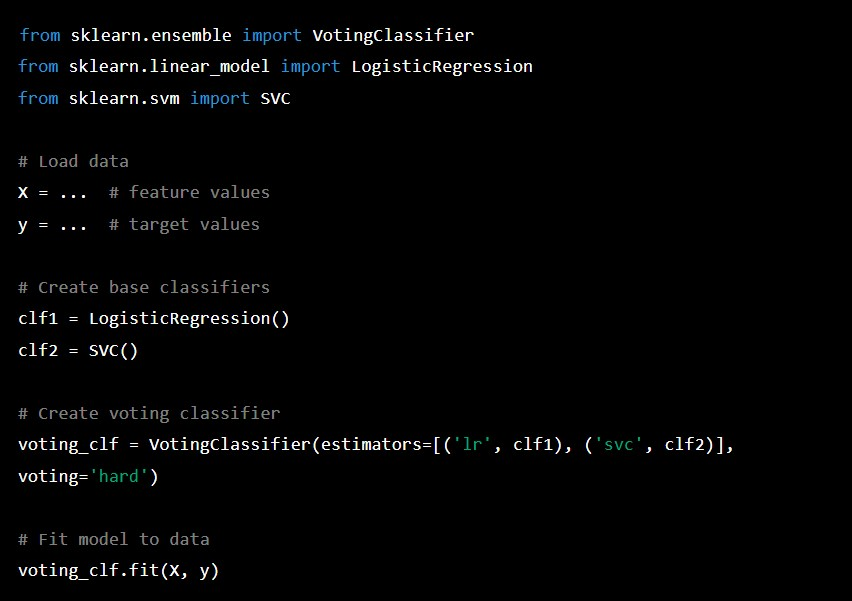